In [4]:
%%capture
#installation fo all the packages
!pip install --upgrade google-api-python-client

In [38]:
from googleapiclient.discovery import build
from IPython.display import JSON
import pandas as pd
import pandas as pd
import numpy as np
from dateutil import parser


# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Google API
from googleapiclient.discovery import build

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aldoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aldoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from config import api_key #imports API key from config.py
api_key = api_key

In [7]:
channel_ids = ["UCbJj68RrcFbFH4UGM-WOWiw", "UCO9W--gggU0qOniocIOXm6Q", "UCeFU92qBf_vDdS9_mGQCbhg"]

In [8]:
##%%capture
api_service_name = "youtube"
api_version = "v3"
# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [9]:
# Get channel stats
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id = ','.join(channel_ids)
    )
    response = request.execute()

    #loop through items
    for item in response['items']:
        data = {'channelName' : item['snippet'] [ 'title'],
        'subscribers': item['statistics'] ['subscriberCount'],
        'views': item['statistics'] ['viewCount'],
        'totalVideos': item['statistics'] ['videoCount'],
        'playlistId' : item['contentDetails'] [ 'relatedPlaylists'] ['uploads']
        }
        all_data.append(data)
    return(pd.DataFrame(all_data))

In [10]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [11]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Nico de la Bombacha,104000,11707088,322,UUbJj68RrcFbFH4UGM-WOWiw
1,MundoCreepy,2600000,462963393,1215,UUeFU92qBf_vDdS9_mGQCbhg
2,Escuadrón Subnormal,29600,672012,234,UUO9W--gggU0qOniocIOXm6Q


In [12]:
playlist_id = "PLCx8c89cdYfA-RdC4699DI1lT5olHhWcc"
def get_video_ids (youtube, playlist_id):
    video_ids = []
    request = youtube.playlistItems ().list(
        part="snippet, contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request. execute ()
    for item in response['items']:
        video_ids. append (item['contentDetails']['videoId'])

    #We need to collect all of the video data on playlist but the limit is 50 so we do a loop
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        next_page_token = response.get('nextPageToken')



    return video_ids


In [13]:
video_ids = get_video_ids(youtube,playlist_id)

In [14]:
len(video_ids)

298

In [15]:
def get_videos_details(youtube, video_ids):
    all_video_info = []

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id= ','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                            'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                            'contentDetails': ['duration', 'definition', 'caption'] }
            video_info ={}
            video_info['video_id'] = video['id']
            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video [k] [v]
                    except:
                        video_info[v] = None
                all_video_info.append(video_info)
    return pd.DataFrame(all_video_info)

In [16]:
video_df = get_videos_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,8dwMpR19K4A,MundoCreepy,4 Historias paranormales en videollamadas III ...,Las videollamadas se han convertido rápidament...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-10-03T17:00:04Z,200269,12233,None,203,PT17M19S,hd,false
1,8dwMpR19K4A,MundoCreepy,4 Historias paranormales en videollamadas III ...,Las videollamadas se han convertido rápidament...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-10-03T17:00:04Z,200269,12233,None,203,PT17M19S,hd,false
2,8dwMpR19K4A,MundoCreepy,4 Historias paranormales en videollamadas III ...,Las videollamadas se han convertido rápidament...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-10-03T17:00:04Z,200269,12233,None,203,PT17M19S,hd,false
3,fxgZHIjxEW4,MundoCreepy,4 Experiencias aterradoras vividas por camione...,Este es uno de los temas que mas nos piden y a...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-09-23T17:00:21Z,216222,12541,None,239,PT20M36S,hd,false
4,fxgZHIjxEW4,MundoCreepy,4 Experiencias aterradoras vividas por camione...,Este es uno de los temas que mas nos piden y a...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-09-23T17:00:21Z,216222,12541,None,239,PT20M36S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,RkucmCk5tIA,MundoCreepy,Encuentros paranormales | anécdotas aterradoras,► Suscribete hoy para enterarte cada vez que s...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2014-07-28T00:41:19Z,165171,4502,None,210,PT11M55S,hd,false
881,RkucmCk5tIA,MundoCreepy,Encuentros paranormales | anécdotas aterradoras,► Suscribete hoy para enterarte cada vez que s...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2014-07-28T00:41:19Z,165171,4502,None,210,PT11M55S,hd,false
882,Treq9UX1hRE,MundoCreepy,4 Historias para contar en HALLOWEEN IV | Mund...,Existen historias que pasan de generación en g...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-10-21T17:00:30Z,128791,8705,None,148,PT20M41S,hd,false
883,Treq9UX1hRE,MundoCreepy,4 Historias para contar en HALLOWEEN IV | Mund...,Existen historias que pasan de generación en g...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-10-21T17:00:30Z,128791,8705,None,148,PT20M41S,hd,false


In [17]:
def get_comments_in_videos(youtube, video_ids):
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)     

In [18]:
video_comments_df = get_comments_in_videos(youtube, video_ids)
#video_comments_df["comments"][0]

Could not get comments for video RkucmCk5tIA
Could not get comments for video eh2FXVb5crU
Could not get comments for video Au6F4XHMzl8


## Data Pre-procesing

In [19]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [20]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [21]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df [numeric_cols] = video_df [numeric_cols]. apply (pd. to_numeric, errors = 'coerce' ,axis = 1)


In [40]:
#publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))


In [45]:
%%capture
!pip install isodate
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs']= video_df['durationSecs'].astype('timedelta64[s]')

In [46]:
video_df[['durationSecs','duration']]

,durationSecs,duration
0,1039.0,PT17M19S
1,1039.0,PT17M19S
2,1039.0,PT17M19S
3,1236.0,PT20M36S
4,1236.0,PT20M36S
...,...,...
880,715.0,PT11M55S
881,715.0,PT11M55S
882,1241.0,PT20M41S
883,1241.0,PT20M41S


In [47]:
#Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [50]:
video_df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagCount
0,8dwMpR19K4A,MundoCreepy,4 Historias paranormales en videollamadas III ...,Las videollamadas se han convertido rápidament...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-10-03 17:00:04+00:00,200269.0,12233.0,NaN,203.0,PT17M19S,hd,false,Monday,1039.0,21
1,8dwMpR19K4A,MundoCreepy,4 Historias paranormales en videollamadas III ...,Las videollamadas se han convertido rápidament...,"[creepy, pasta, mundocreepy, mundo, terror, ps...",2022-10-03 17:00:04+00:00,200269.0,12233.0,NaN,203.0,PT17M19S,hd,false,Monday,1039.0,21


## EDA
### Best performing videos

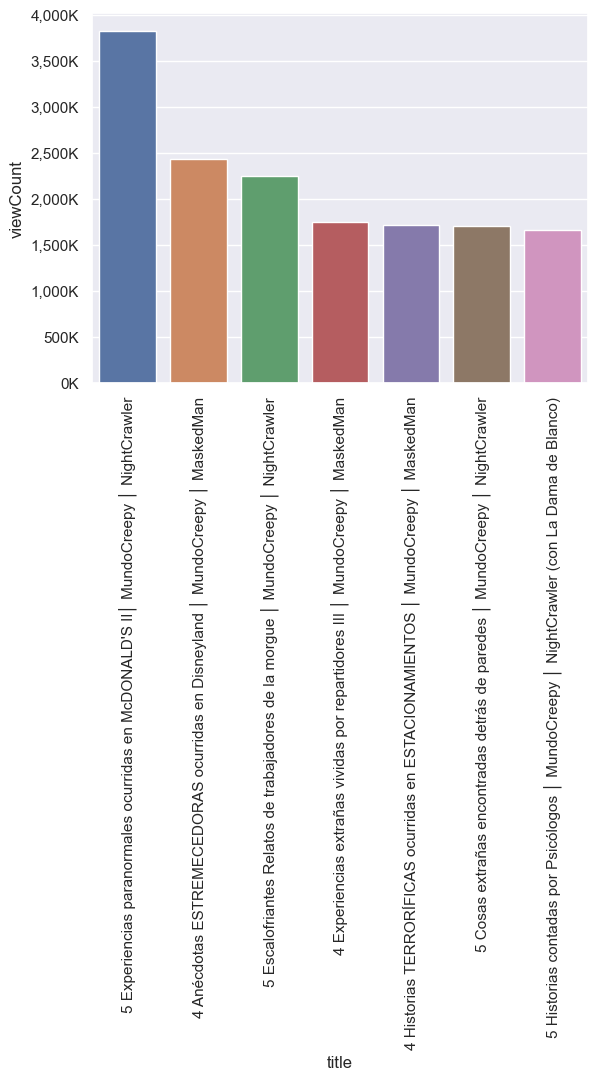

In [61]:
ax = sns.barplot(x = 'title', y= 'viewCount', data= video_df.sort_values('viewCount', ascending=False) [0:20])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

## Worst Performing videos

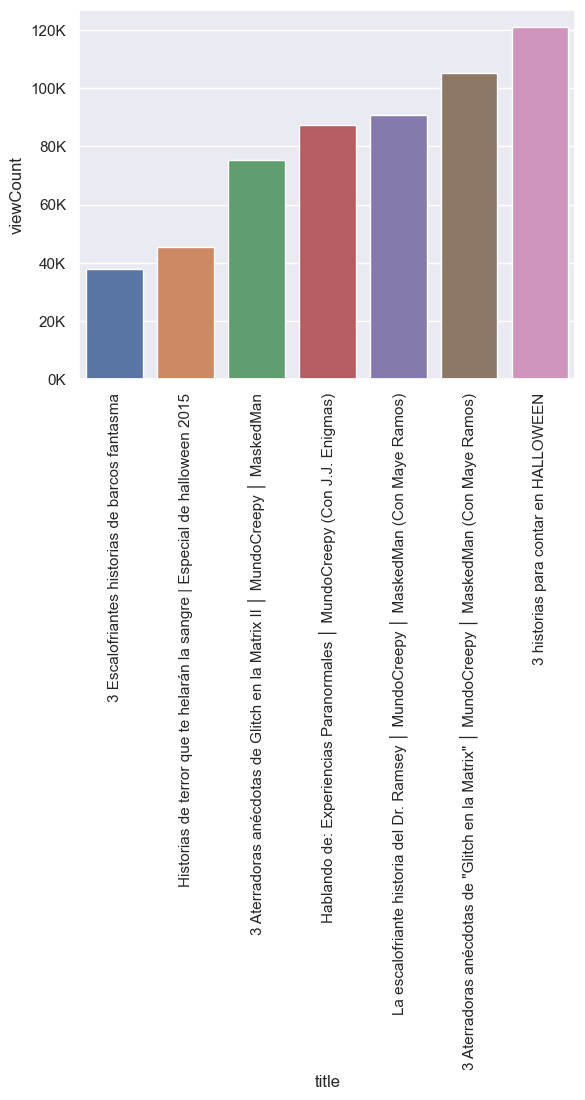

In [60]:
ax = sns.barplot(x = 'title', y= 'viewCount', data= video_df.sort_values('viewCount', ascending=True) [0:20])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

## View distribution per video|

c:\Users\aldoe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

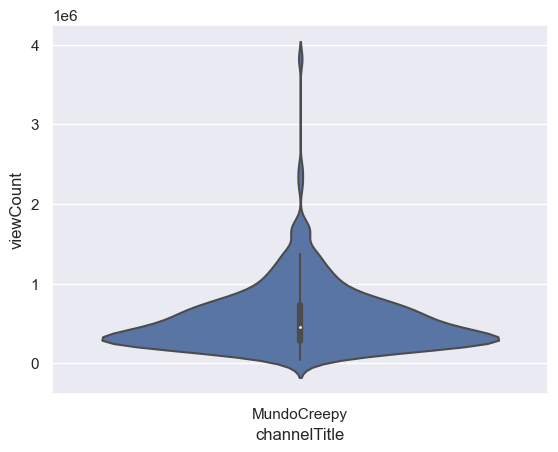

In [62]:
sns.violinplot(video_df['channelTitle'], video_df['viewCount'])

## Views vs. likes and comments

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

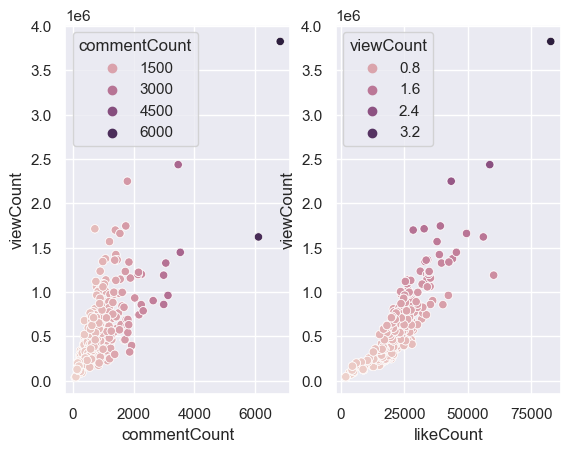

In [69]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x= 'commentCount', y='viewCount', hue="commentCount", ax=ax[0])
sns.scatterplot(data = video_df, x= 'likeCount', y='viewCount',hue="viewCount", ax=ax[1])

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

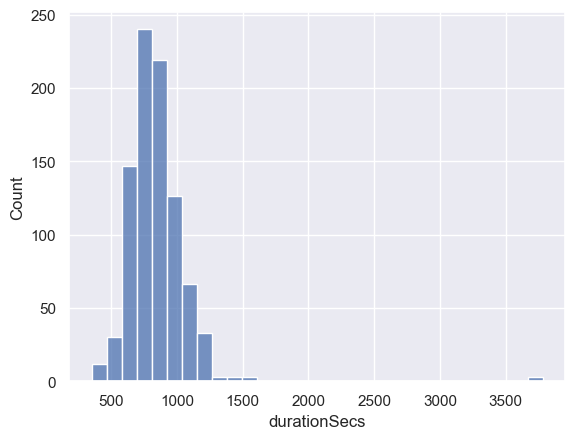

In [70]:
sns.histplot(data=video_df, x='durationSecs',bins=30)

In [71]:
%%capture
!pip install wordcloud
from wordcloud import WordCloud

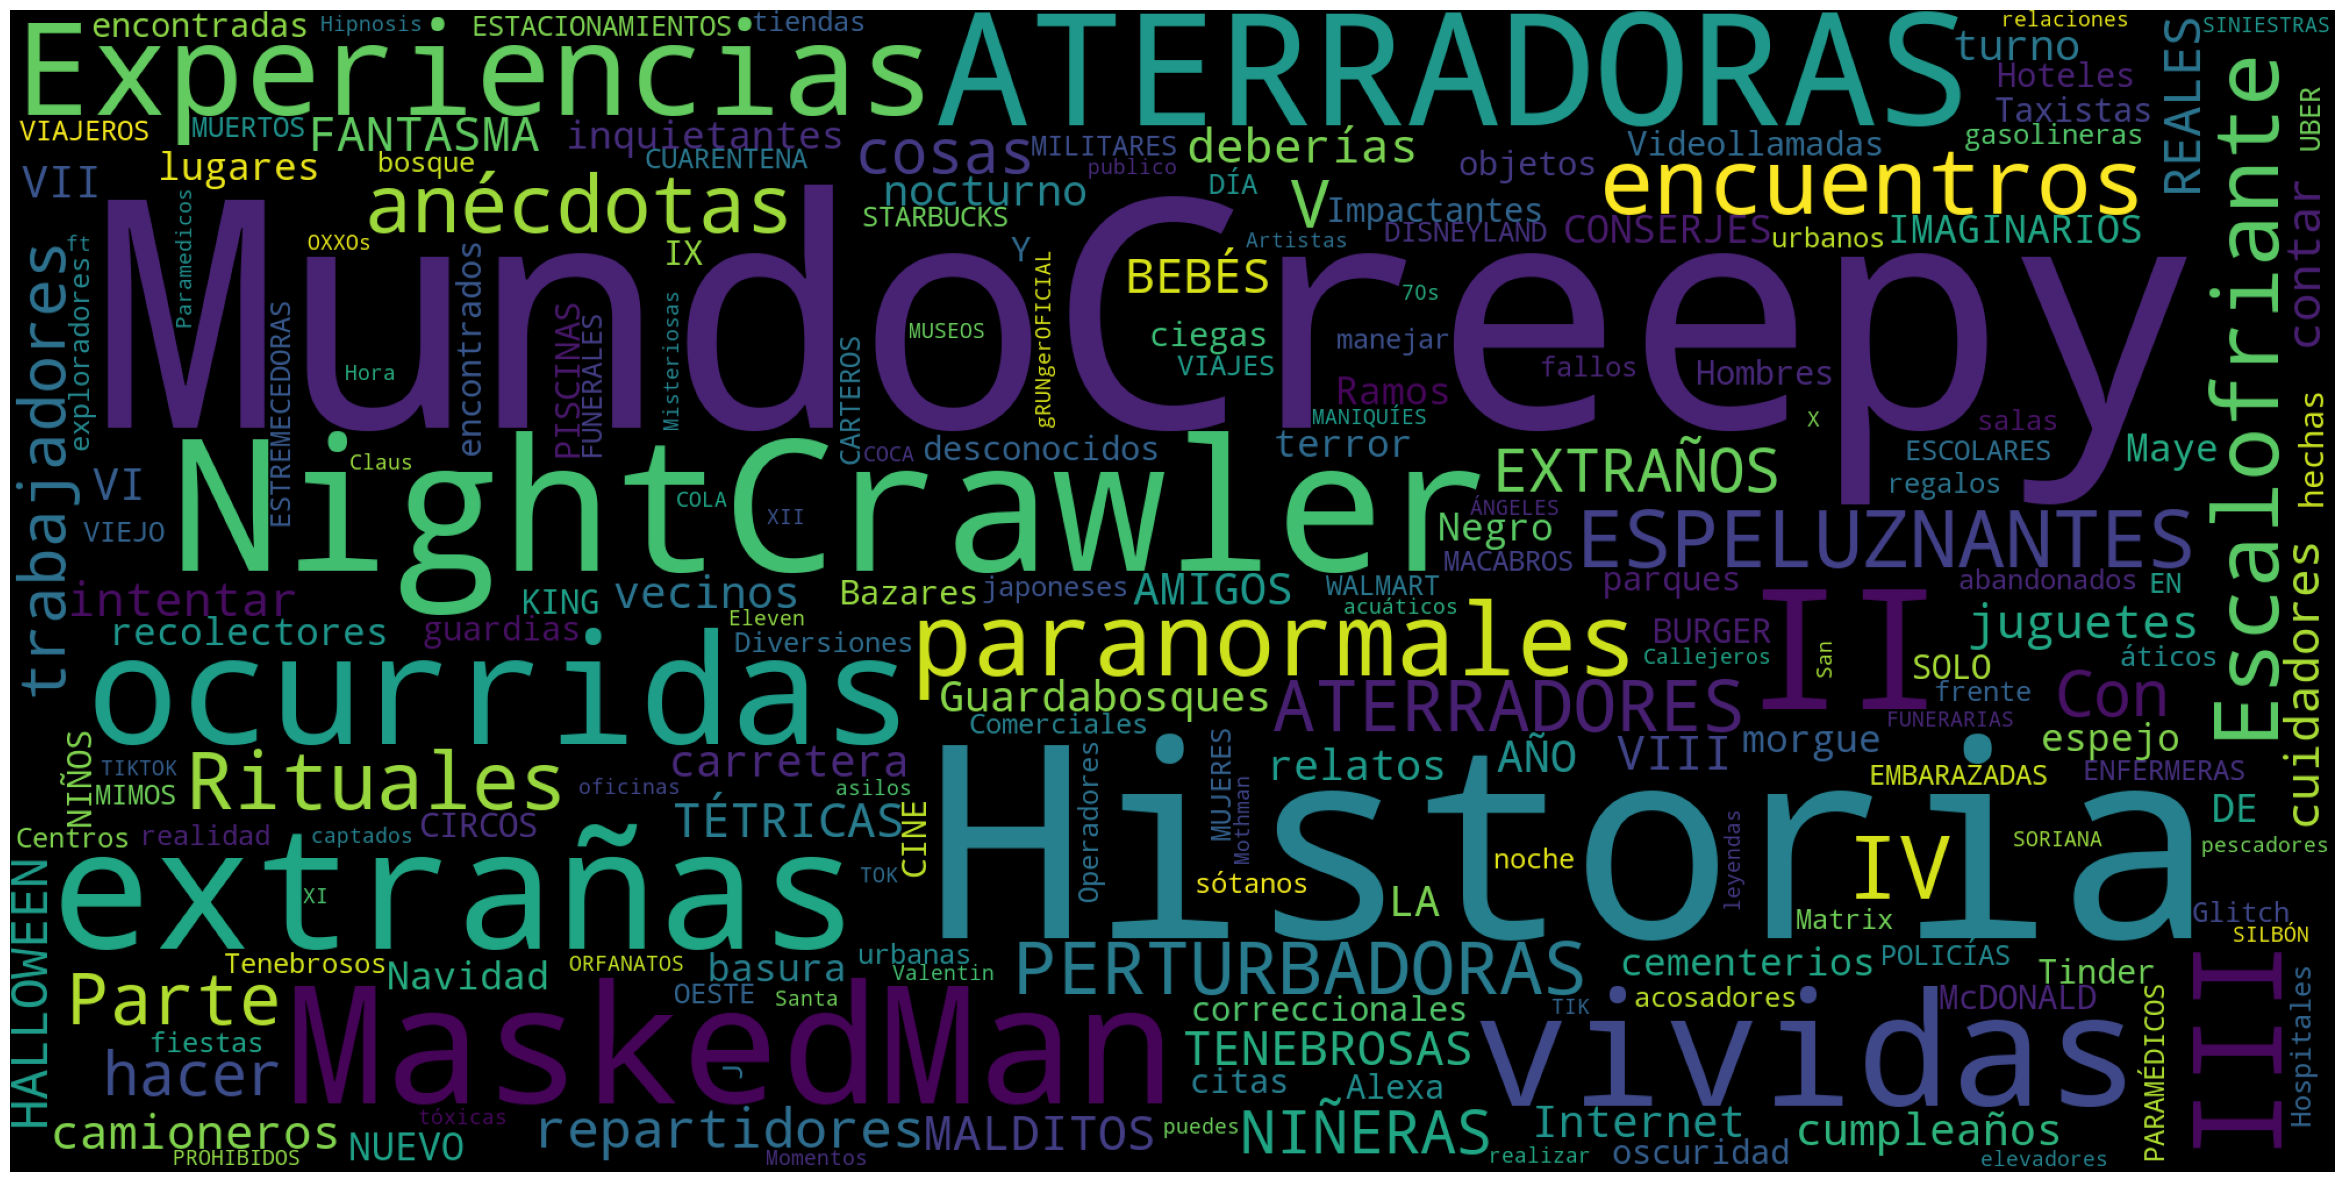

In [75]:
stop_words = set(stopwords.words('spanish'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height= 1000, random_state=1, background_color='black',
                        colormap='viridis', collocations=False).generate(all_words_str)

plot_cloud(wordcloud)


## Days published videos

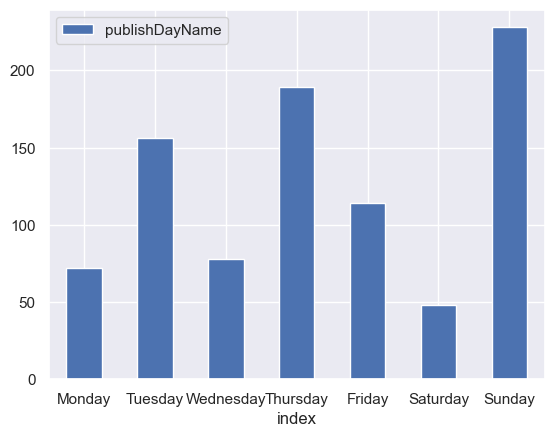

In [80]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishDayName', rot=0)
